In [36]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from skimage import filters

In [37]:
def create_synthetic_image(height=200, width=300):
    image = np.zeros((height, width), dtype=np.uint8)

    # Object 1: Ellipse (sun) – pixel value 120
    cv2.ellipse(image, center=(80, 80), axes=(40, 25), angle=0, startAngle=0, endAngle=360, color=120, thickness=-1)

    # Object 2: Rectangle (building) – pixel value 180
    cv2.rectangle(image, pt1=(180, 100), pt2=(260, 190), color=180, thickness=-1)

    return image

In [38]:
# 2. Add Gaussian noise
def add_gaussian_noise(image, mean=0, std=20):
    noise = np.random.normal(mean, std, image.shape)
    noisy_img = image + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

In [39]:
# 3. Apply Otsu's thresholding
def apply_otsu_threshold(image):
    # OpenCV method
    _, thresh_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Skimage method
    otsu_thresh = filters.threshold_otsu(image)
    binary_img = (image > otsu_thresh).astype(np.uint8) * 255

    return thresh_img, binary_img, otsu_thresh

In [40]:
# 4. Run the pipeline
original_img = create_synthetic_image()
noisy_img = add_gaussian_noise(original_img)
otsu_cv, otsu_sk, threshold_value = apply_otsu_threshold(noisy_img)

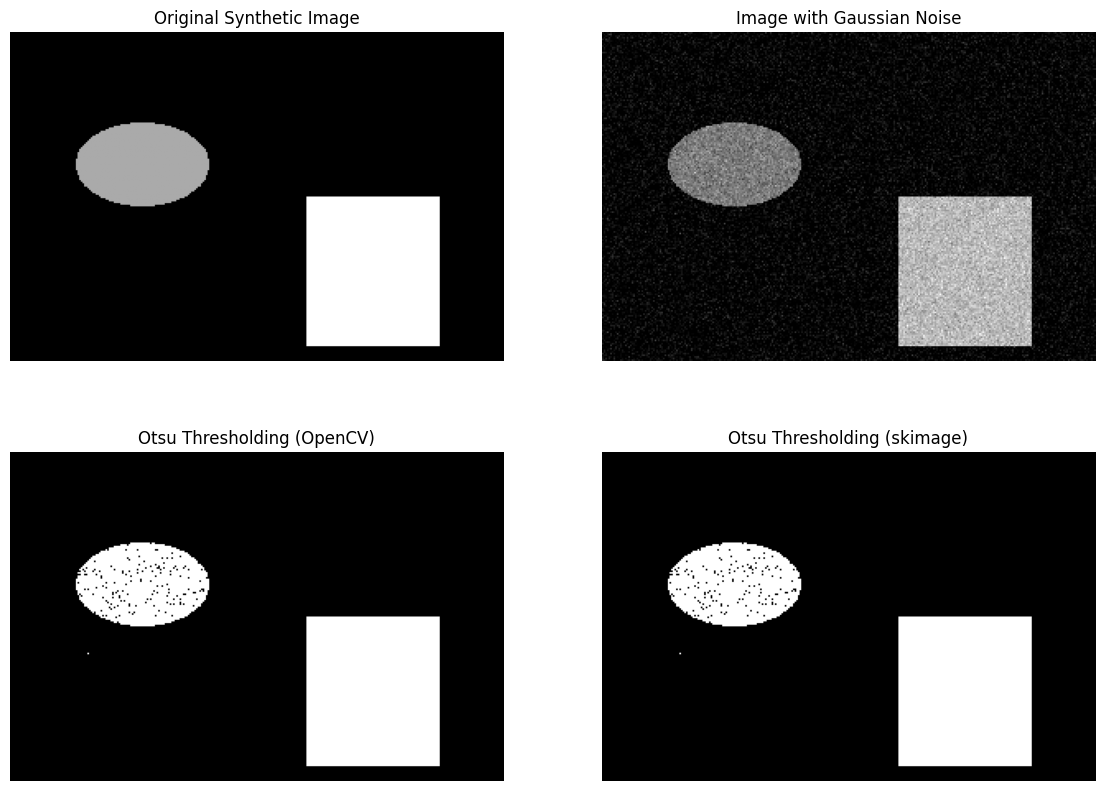

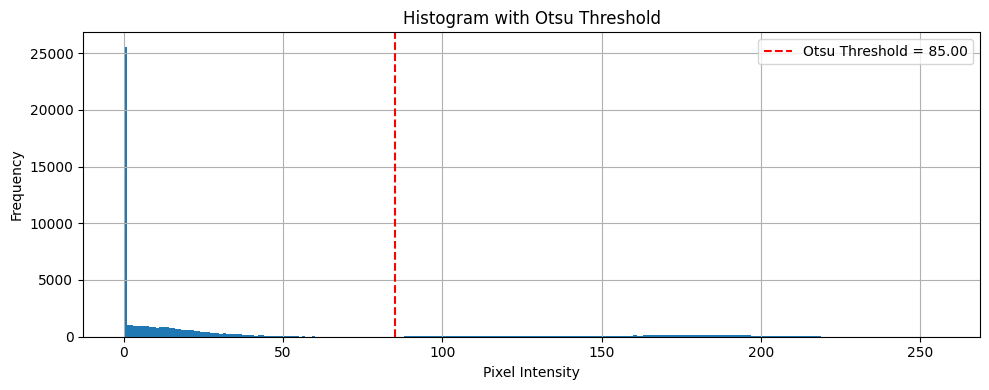

In [41]:
plt.figure(figsize=(14, 10))

# Row 1: image comparisons
plt.subplot(2, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original Synthetic Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')

# Row 2: binary results
plt.subplot(2, 2, 3)
plt.imshow(otsu_cv, cmap='gray')
plt.title("Otsu Thresholding (OpenCV)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(otsu_sk, cmap='gray')
plt.title("Otsu Thresholding (skimage)")
plt.axis('off')

plt.figure(figsize=(10, 4))
plt.hist(noisy_img.ravel(), bins=256, range=(0, 256))
plt.axvline(threshold_value, color='r', linestyle='--', label=f'Otsu Threshold = {threshold_value:.2f}')
plt.title("Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
result_dir = os.path.join("..", "outputs", "task_01")
os.makedirs(result_dir, exist_ok=True)

cv2.imwrite(os.path.join(result_dir, "01_original_synthetic.jpg"), original_img)
cv2.imwrite(os.path.join(result_dir, "02_gaussian_noise.jpg"), noisy_img)
cv2.imwrite(os.path.join(result_dir, "03_otsu_opencv.jpg"), otsu_cv)
cv2.imwrite(os.path.join(result_dir, "04_otsu_skimage.jpg"), otsu_sk)

True